In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
NROWS = 10000 # Количество загружаемых строк из датасета

df = pd.read_json('Datasets/yelp_academic_dataset_review.json', lines=True, nrows=NROWS)

df = df[['text','stars']]

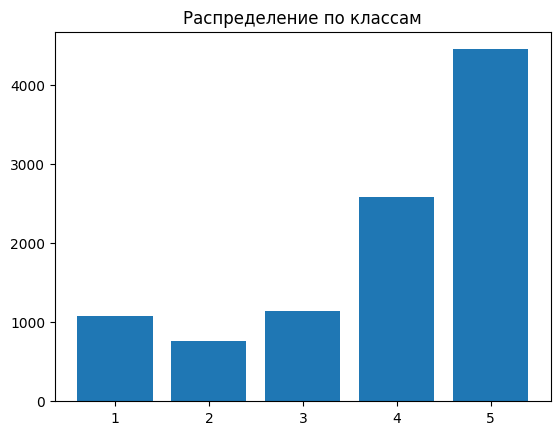

In [6]:
df['stars'].hist(bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.8)

plt.title("Распределение по классам")
plt.xticks(range(1,6))
plt.grid(False)
plt.savefig("Plots/dataset_hist.png")

In [7]:
import nltk
#nltk.download('stopwords') <- использовать при первом запуске
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import re
import json

In [12]:
def clean_dataset(df):
    corpus = []

    for i in range(NROWS):
        # Оставляем только символы алфавита
        text = re.sub('[^a-zA-Z]', ' ', df['text'][i])

        text = text.lower()
        text = text.split()
        
        text = [word for word in text]
        text = ' '.join(text)
        
        corpus.append(text)
        
    ratings = df.iloc[:, 1].values

    processed_dataset = [{"text": text, "rating": float(rating)} for text, rating in zip(corpus, ratings)]

    with open("Datasets/cleaned_dataset.json", "w") as f:
        json.dump(processed_dataset, f)

In [9]:
def preprocess_dataset(df):
    stemmer = PorterStemmer()
    corpus = []

    for i in range(NROWS):
        # Оставляем только символы алфавита
        text = re.sub('[^a-zA-Z]', ' ', df['text'][i])

        text = text.lower()
        text = text.split()
        
        stemmed_text = [stemmer.stem(word) for word in text if not word in set(stopwords.words('english'))]
        stemmed_text = ' '.join(stemmed_text)
        
        corpus.append(stemmed_text)
        
    ratings = df.iloc[:, 1].values

    processed_dataset = [{"text": text, "rating": float(rating)} for text, rating in zip(corpus, ratings)]

    with open("Datasets/processed_dataset.json", "w") as f:
        json.dump(processed_dataset, f)

In [10]:
preprocess_dataset(df)

In [11]:
clean_dataset(df)